In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [30]:
import pandas as pd

dataset = pd.read_csv('carmpg.csv')
vol = np.array(dataset['VOL'])
mpg = np.array(dataset['MPG'])
hp = np.array(dataset['HP'])
sp = np.array(dataset['SP'])
wt = np.array(dataset['WT'])


In [31]:
# Build the X matrix
X = np.column_stack((vol, hp, sp, wt))
X = np.column_stack((np.ones(len(hp)), X))
# print(X)

In [32]:
# Beta = (X_transposed * X) * X_inverse * Y
beta = np.linalg.inv(X.T @ X) @ X.T @ mpg
print("Beta coefficients: ", beta)

Beta coefficients:  [ 1.92437753e+02 -1.56450113e-02  3.92212315e-01 -1.29481848e+00
 -1.85980373e+00]


In [36]:
Y_hat = X @ beta
# print("Y_hat: ", Y_hat)

In [34]:
# Predict
def car_mileage_pred(beta, vol_input, hp_input, sp_input, wt_input):
    return beta[0] + beta[1] * vol_input + beta[2] * hp_input + beta[3] * sp_input + beta[4] * wt_input

In [37]:
print(car_mileage_pred(beta, 92, 55, 97, 20))

49.776622741559954


In [38]:
residuals = mpg - Y_hat
print(residuals)

[11.98538832  6.22337726  6.12337726  3.69874036 -3.78701659  0.85180532
 -4.37662274 11.96512838  6.06512838  1.44705351 -3.36495926  1.3210361
  2.08764165 -4.06495926 -6.00392849 -5.16495926 -3.61027537 -0.7789639
 -4.31027537  3.70488174  2.85269554 -1.815689    2.1021671  -0.95399642
  0.71442696 -0.41391001  0.63430574  0.35269554 -9.01076327  3.37255295
  1.30266644 -2.9891508  -3.19253594 -0.65638983 -0.50606965 -4.31071748
 -2.70828943 -2.96473955 -0.96861259 -1.26861259  1.48631592 -2.68516652
 -2.7946816  -1.87474253 -3.0762918  -4.06765549 -2.97562129 -2.88788116
 -3.5234351   0.29244585  3.96632112  2.86632112  1.56632112  1.92615638
  6.43590427  2.42160274  0.51188253 -3.48617934 -1.73367888 -2.43410162
 -0.81073791  0.59940505  0.8493164   2.00347462  0.47831453  0.10935679
 -0.41053134  0.59074938  0.79413453  0.73155448  2.7477546   3.48815462
  0.60111309  0.25417805  4.17692468  3.69192933  0.80750157 -2.51165157
 -1.81935334 -3.7778576  -2.60096111  0.4897637 ]


In [39]:
mse = np.mean(residuals**2)
print(mse)

12.529042405547074


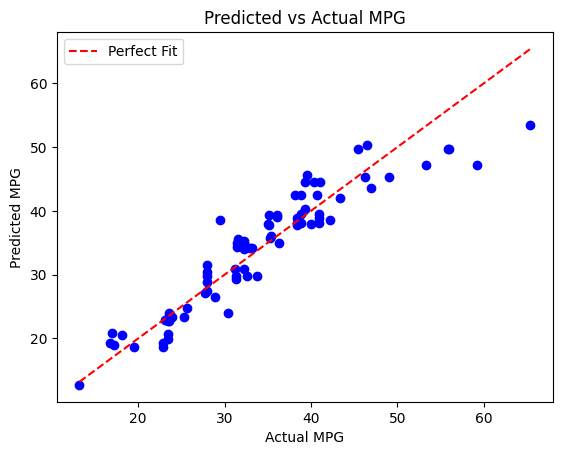

In [40]:
plt.scatter(mpg, Y_hat, color="blue")
plt.plot([min(mpg), max(mpg)], [min(mpg), max(mpg)], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Predicted vs Actual MPG")
plt.legend()
plt.show()

In [43]:
variance = np.sum((mpg - np.mean(mpg))**2) / (len(mpg) - 1)
print(variance)

100.09213038241494
